Pacotes necessários

In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('seaborn')
plt.rcParams['text.color'] = 'black'

/tmp/ipykernel_25316/1507431674.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VXXXX | Explicação da variável | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|


 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082 

 *PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.*

Importação das bases

In [2]:
#ler todos as arquivos feather na mesma pasta
# import os
# import glob
# path = '/home/matheus/Microdados PNAD/PNAD_COVID'
# all_files = glob.glob(os.path.join(path, "*.feather"))
# df_from_each_file = (pd.read_feather(f) for f in all_files)
# pnad_covid = pd.concat(df_from_each_file, ignore_index=True)

In [14]:
filtro = ['Ano', 'V1013', 'V1012', 'UF', 'A002', 'C013', 'V1032']

p_covid5 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_052020.feather', columns=filtro)
p_covid6 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_062020.feather', columns=filtro)
p_covid7 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_072020.feather', columns=filtro)
p_covid8 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_082020.feather', columns=filtro)
p_covid9 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_092020.feather', columns=filtro)
p_covid10 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_102020.feather', columns=filtro)
p_covid11 = pd.read_feather('../Dados/pnad_covid/original/PNAD_COVID_112020.feather', columns=filtro)

pnad_covid = pd.concat([p_covid5, p_covid6, p_covid7, p_covid8, p_covid9, p_covid10, p_covid11])

In [126]:
pnad_covid['V1013'] = pnad_covid['V1013'].astype('int')
#pnad_covid['posest'] = pnad_covid['posest'].astype('int')

In [12]:
pnad_covid.sort_values(by=['V1013', 'V1012'], ascending=[True, True],inplace=True)

In [13]:
pnad_covid

,Ano,V1013,V1012,UF,A002,C013
253650,2020,10,1,São Paulo,60,NaN
253669,2020,10,1,São Paulo,50,NaN
253662,2020,10,1,São Paulo,13,NaN
253661,2020,10,1,São Paulo,16,NaN
253660,2020,10,1,São Paulo,39,NaN
...,...,...,...,...,...,...
129327,2020,9,4,Alagoas,9,NaN
129370,2020,9,4,Alagoas,30,NaN
129369,2020,9,4,Alagoas,61,NaN
129351,2020,9,4,Alagoas,48,NaN


In [127]:
teletrabalho = pnad_covid[pnad_covid['C013'] == 'Sim']

In [128]:
ocupados = pnad_covid[pnad_covid['C001'] == 'Sim']

In [210]:
pnad_covid.head()

,Ano,V1013,UF,CAPITAL,RM_RIDE,V1008,V1012,V1016,Estrato,UPA,...,F002A5,F0061,F006,ID_DOMICILIO,Habitual,Efetivo,CO3,A006A,A006B,A007A
2365288,2020,5,Ceará,Município de Fortaleza (CE),Região Metropolitana de Fortaleza (CE),7,2,1,2310111,230004866,...,NaN,Pessoa moradora,3.0,2300048667,1.035587,1.030181,1.779061,NaN,NaN,NaN
2301191,2020,5,Rondônia,Município de Porto Velho (RO),NaN,1,2,1,1110011,110000034,...,NaN,Pessoa moradora,2.0,1100000341,1.033408,1.029430,1.687753,NaN,NaN,NaN
2301173,2020,5,Rondônia,Município de Porto Velho (RO),NaN,4,2,1,1110011,110000016,...,NaN,Pessoa moradora,1.0,1100000164,1.033408,1.029430,1.687753,NaN,NaN,NaN
2301172,2020,5,Rondônia,Município de Porto Velho (RO),NaN,3,1,1,1110011,110000016,...,NaN,Pessoa moradora,3.0,1100000163,1.033408,1.029430,1.687753,NaN,NaN,NaN
2301171,2020,5,Rondônia,Município de Porto Velho (RO),NaN,3,1,1,1110011,110000016,...,NaN,Pessoa moradora,3.0,1100000163,1.033408,1.029430,1.687753,NaN,NaN,NaN


In [198]:
#total de pessoas ocupadas por sexo
pd.crosstab(ocupados['V1013'], ocupados['A003'], values=ocupados['V1031'], aggfunc='sum', margins=True)

A003,Homem,Mulher,All
V1013,,,
5,3.468585e+07,2.469354e+07,5.937939e+07
6,3.604428e+07,2.589505e+07,6.193933e+07
7,3.761380e+07,2.673974e+07,6.435354e+07
8,3.909366e+07,2.827398e+07,6.736764e+07
9,3.991300e+07,2.906524e+07,6.897825e+07
10,4.058459e+07,2.987203e+07,7.045663e+07
11,4.077315e+07,3.026475e+07,7.103790e+07
All,2.687083e+08,1.948043e+08,4.635127e+08


In [212]:
#total de pessoas em teletrabalho por sexo
pd.crosstab(teletrabalho['V1013'], teletrabalho['A003'], values=teletrabalho['V1032'], aggfunc='sum', margins=True)

A003,Homem,Mulher,All
V1013,,,
5,4.039689e+06,4.669640e+06,8.709329e+06
6,3.868319e+06,4.825521e+06,8.693840e+06
7,3.725999e+06,4.676773e+06,8.402772e+06
8,3.614390e+06,4.761389e+06,8.375778e+06
9,3.470952e+06,4.602460e+06,8.073412e+06
10,3.273110e+06,4.322865e+06,7.595976e+06
11,3.090486e+06,4.239596e+06,7.330083e+06
All,2.508294e+07,3.209824e+07,5.718119e+07


In [148]:
prop_sexo_remoto = ((pd.crosstab(teletrabalho['V1013'], teletrabalho['A003'], values=teletrabalho['V1031'], aggfunc='sum') / pd.crosstab(ocupados['V1013'], ocupados['A003'], values=ocupados['V1031'], aggfunc='sum'))*100).round(1)

In [152]:
#change de cross table to a dataframe

prop_sexo_remoto.reset_index(inplace=True)

In [161]:
prop_sexo_remoto.columns = ['Gênero', 'Mês', 'homem', 'mulher']

In [164]:
prop_sexo_remoto.set_index('Mês', inplace=True)

In [166]:
prop_sexo_remoto.drop('Gênero', axis=1, inplace=True)

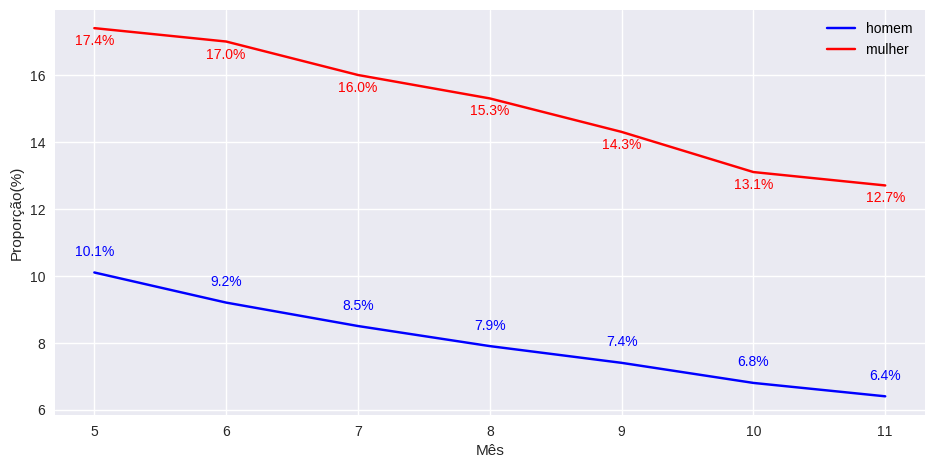

In [194]:
prop_sexo_remoto.plot(kind='line', figsize=(10,5), color=['#0000FF', '#FF0000'])
plt.ylabel('Proporção(%)')
#show the values in the graph
for i in range(0, len(prop_sexo_remoto)):
    plt.text(x=i+5, y=prop_sexo_remoto.iloc[i,0]+0.5, s=str(prop_sexo_remoto.iloc[i,0])+'%', color='#0000FF', ha='center')
    plt.text(x=i+5, y=prop_sexo_remoto.iloc[i,1]-0.5, s=str(prop_sexo_remoto.iloc[i,1])+'%', color='#FF0000', ha='center')

plt.show()

para calcular a média por determinada coluna

In [ ]:
def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result